In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Project Description:

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit


About The Dataset:

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



Dataset Attributes
Here is the description of all the variables:
•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign
Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv")
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
df1=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv")
df1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [4]:
#Encoding categorical columns using Label Encoder
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
for i in df1.columns:
    if df1[i].dtypes=="object":
        df1[i]=lab_enc.fit_transform(df1[i])
df1        

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,11743,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,28292,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3
13562,45163,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2


In [4]:
df.shape

(31647, 18)

This dataset has 31647 rows and 18 columns 

In [5]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

These are the columns present in the dataset.

In [5]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [6]:
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [7]:
#checking the null values in all the columns
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no null values present in the dataset.

<AxesSubplot:>

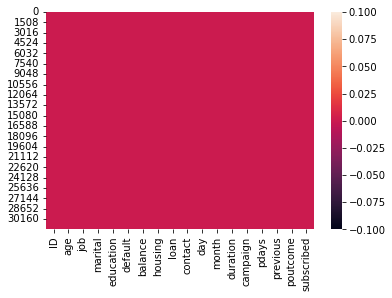

In [8]:
#Let us visualize by using heatmap.
sns.heatmap(df.isnull())

we can clearly see that there are no null values present in the dataset.

In [9]:
#checking the unique values in all the columns
df.nunique()

ID            31647
age              76
job              12
marital           3
education         4
default           2
balance        6326
housing           2
loan              2
contact           3
day              31
month            12
duration       1454
campaign         45
pdays           509
previous         38
poutcome          4
subscribed        2
dtype: int64

These are the unique values present in the dataset.

In [20]:
#checking the value counts of all the columns
for i in df.columns:
    print(df[i].value_counts())

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64
no     31062
yes      585
Name: default, dtype: int64
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 296

These are the value counts of all the columns present in the dataset.

In [10]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

There are two types of data i.e., int64 and object present in the dataset.

In [11]:
#checking the duplicate values present in the dataset.
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
31642    False
31643    False
31644    False
31645    False
31646    False
Length: 31647, dtype: bool

In [23]:
df.duplicated().sum()

0

There are no duplicate values present in the dataset.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


This gives the brief information  about column names , non null count,data type and memory usage in the dataset.

In [13]:
#checking the unique values in target column
df["subscribed"].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [26]:
#Description of Dataset:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


This gives the stastical summary of numerical columns.The counts of all the columns are same which means there are no missing values in the dataset.The summary of the dataset looks perfect since there is no negative/invalid values present.

The mean is greater than the median in ID,age,balance,duration,campaign,pdays,previous columns which means the data is skewed to right in these columns.

The mean is less than the median in day column which means the data is skewed to left in this column.

By summarizing the data we can observe there is a huge differences between 75% and max,hence there are outliers present in the data.

We can also notice that the standard deviation, minimum value and 25% percentile values from this describe method.

Data Visualization:

no     27932
yes     3715
Name: subscribed, dtype: int64


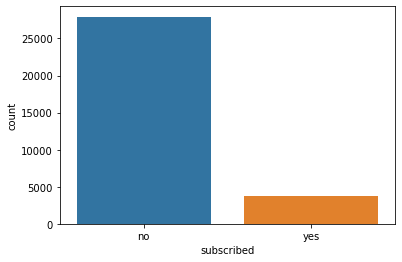

In [19]:
#Visualize the count of subscribed column
ax=sns.countplot(x="subscribed",data=df)
print(df["subscribed"].value_counts())

32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


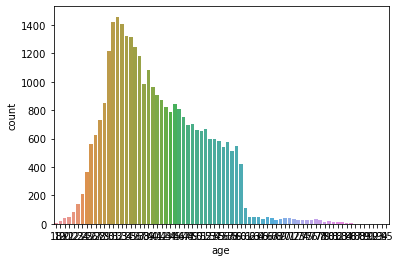

In [14]:
#Visualize the count of age column
ax=sns.countplot(x="age",data=df)
print(df["age"].value_counts())

The age having 32 is more

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


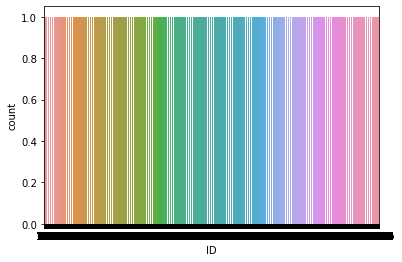

In [17]:
#Visualize the count of ID column
ax=sns.countplot(x="ID",data=df)
print(df["ID"].value_counts())

 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: balance, Length: 6326, dtype: int64


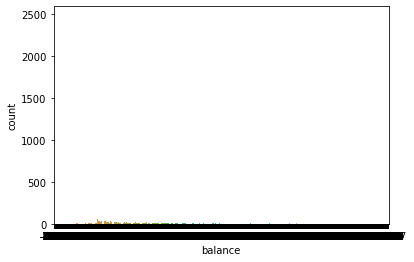

In [19]:
#Visualize the count of balance column
ax=sns.countplot(x="balance",data=df)
print(df["balance"].value_counts())

20    1909
18    1612
21    1445
5     1373
6     1348
17    1344
14    1283
8     1281
28    1276
29    1241
7     1240
19    1228
15    1208
12    1116
13    1099
9     1097
30    1082
4     1016
11    1014
16     981
2      900
27     804
3      761
26     761
23     657
22     640
25     586
31     460
10     360
24     305
1      220
Name: day, dtype: int64


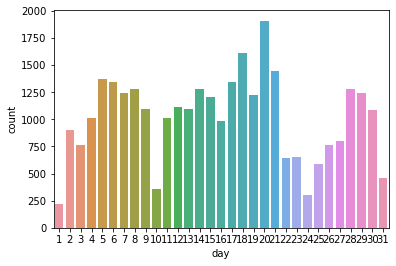

In [20]:
#Visualize the count of day column
ax=sns.countplot(x="day",data=df)
print(df["day"].value_counts())

90      135
124     130
139     127
88      127
104     127
       ... 
1405      1
1090      1
1261      1
1218      1
1973      1
Name: duration, Length: 1454, dtype: int64


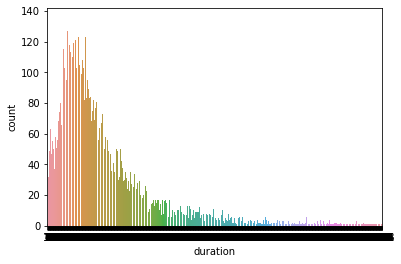

In [22]:
#Visualize the count of duration column
ax=sns.countplot(x="duration",data=df)
print(df["duration"].value_counts())

1     12262
2      8798
3      3858
4      2442
5      1245
6       916
7       518
8       356
9       236
10      184
11      126
12      102
13       93
14       68
15       61
16       54
17       52
20       37
18       37
19       30
21       19
22       18
25       17
28       14
23       13
24       13
29       12
26        9
31        9
27        8
30        6
32        6
33        5
34        5
43        3
35        3
38        3
37        2
63        1
41        1
50        1
55        1
44        1
36        1
39        1
Name: campaign, dtype: int64


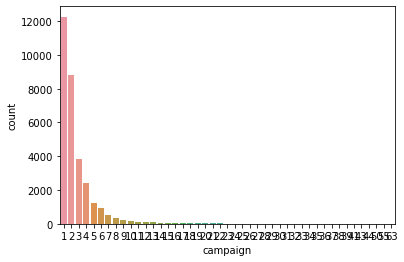

In [23]:
#Visualize the count of campaign column
ax=sns.countplot(x="campaign",data=df)
print(df["campaign"].value_counts())

-1      25924
 182      118
 92       100
 91        87
 183       85
        ...  
 51         1
 20         1
 25         1
 526        1
 382        1
Name: pdays, Length: 509, dtype: int64


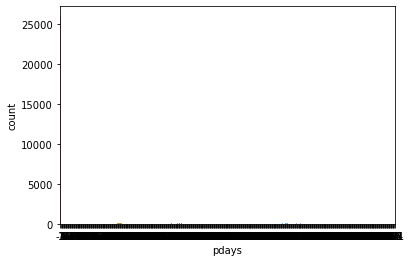

In [24]:
#Visualize the count of pdays column
ax=sns.countplot(x="pdays",data=df)
print(df["pdays"].value_counts())

0      25924
1       1921
2       1481
3        780
4        501
5        311
6        188
7        138
8         81
9         64
10        49
11        46
13        30
12        30
15        15
14        14
17        11
16         8
19         8
23         6
18         5
20         5
21         4
22         4
25         4
27         4
26         2
29         2
24         2
275        1
28         1
32         1
30         1
38         1
58         1
35         1
41         1
37         1
Name: previous, dtype: int64


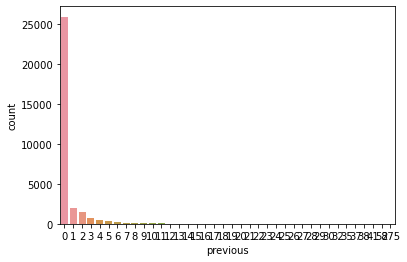

In [25]:
#Visualize the count of previous column
ax=sns.countplot(x="previous",data=df)
print(df["previous"].value_counts())

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


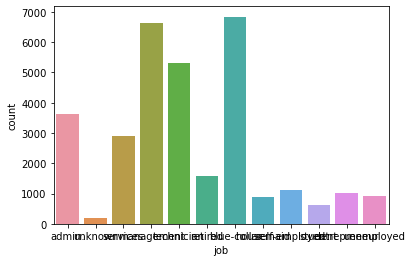

In [18]:
#Visualize the count of job column
ax=sns.countplot(x="job",data=df)
print(df["job"].value_counts())

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


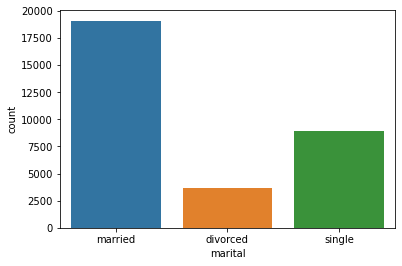

In [21]:
#Visualize the count of marital column
ax=sns.countplot(x="marital",data=df)
print(df["marital"].value_counts())

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


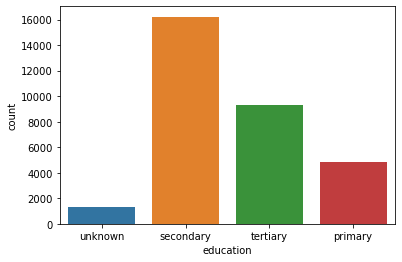

In [26]:
#Visualize the count of education column
ax=sns.countplot(x="education",data=df)
print(df["education"].value_counts())

no     31062
yes      585
Name: default, dtype: int64


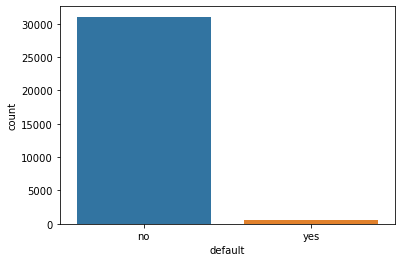

In [27]:
#Visualize the count of default column
ax=sns.countplot(x="default",data=df)
print(df["default"].value_counts())

yes    17584
no     14063
Name: housing, dtype: int64


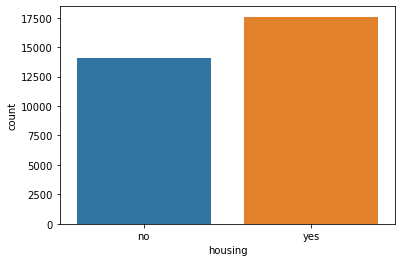

In [28]:
#Visualize the count of housing column
ax=sns.countplot(x="housing",data=df)
print(df["housing"].value_counts())

no     26516
yes     5131
Name: loan, dtype: int64


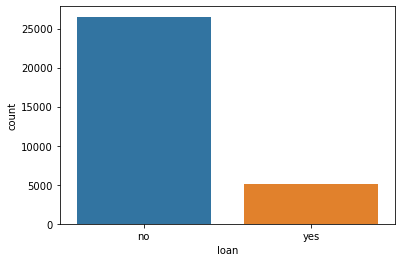

In [29]:
#Visualize the count of loan column
ax=sns.countplot(x="loan",data=df)
print(df["loan"].value_counts())

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


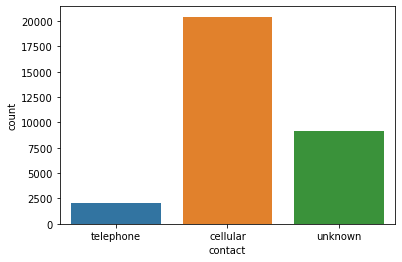

In [30]:
#Visualize the count of contact column
ax=sns.countplot(x="contact",data=df)
print(df["contact"].value_counts())

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


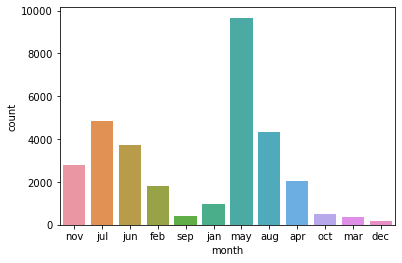

In [31]:
#Visualize the count of month column
ax=sns.countplot(x="month",data=df)
print(df["month"].value_counts())

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64


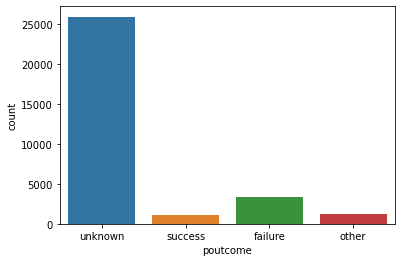

In [32]:
#Visualize the count of poutcome column
ax=sns.countplot(x="poutcome",data=df)
print(df["poutcome"].value_counts())

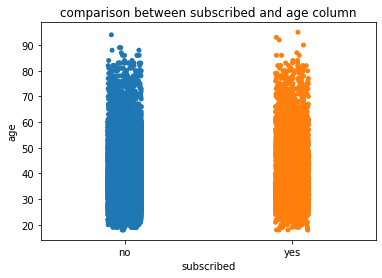

In [34]:
#comparing subscribed and age column
plt.title("comparison between subscribed and age column")
sns.stripplot(x="subscribed",y="age",data=df)
plt.show()

In [35]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

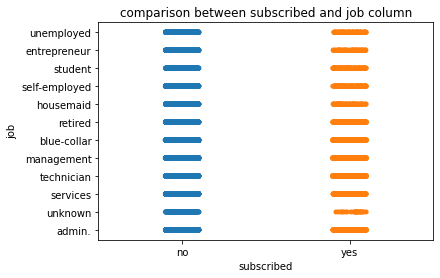

In [36]:
#comparing subscribed and job column
plt.title("comparison between subscribed and job column")
sns.stripplot(x="subscribed",y="job",data=df)
plt.show()

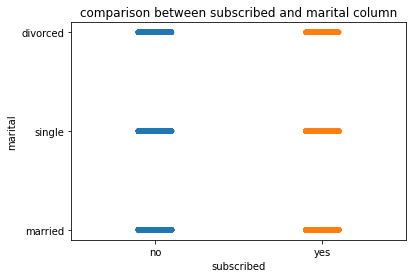

In [37]:
#comparing subscribed and marital column
plt.title("comparison between subscribed and marital column")
sns.stripplot(x="subscribed",y="marital",data=df)
plt.show()

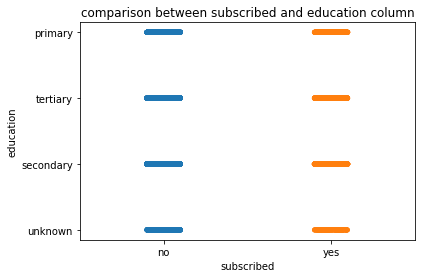

In [38]:
#comparing subscribed and education column
plt.title("comparison between subscribed and education column")
sns.stripplot(x="subscribed",y="education",data=df)
plt.show()

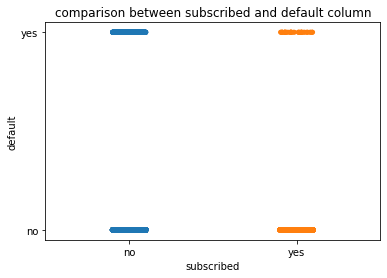

In [39]:
#comparing subscribed and default column
plt.title("comparison between subscribed and default column")
sns.stripplot(x="subscribed",y="default",data=df)
plt.show()

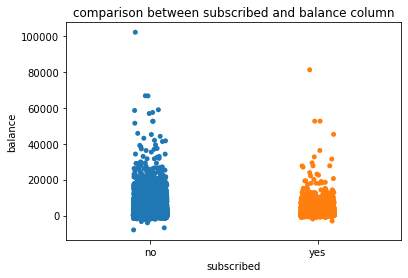

In [40]:
#comparing subscribed and balance column
plt.title("comparison between subscribed and balance column")
sns.stripplot(x="subscribed",y="balance",data=df)
plt.show()

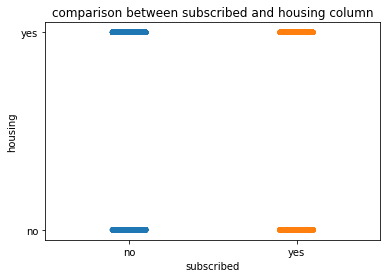

In [42]:
#comparing subscribed and housing column
plt.title("comparison between subscribed and housing column")
sns.stripplot(x="subscribed",y="housing",data=df)
plt.show()

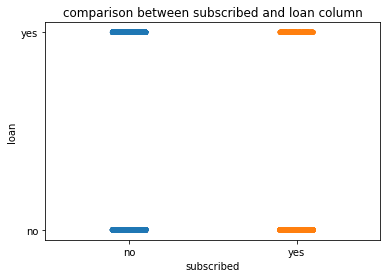

In [43]:
#comparing subscribed and loan column
plt.title("comparison between subscribed and loan column")
sns.stripplot(x="subscribed",y="loan",data=df)
plt.show()

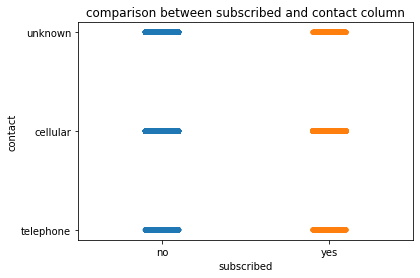

In [44]:
#comparing subscribed and contact column
plt.title("comparison between subscribed and contact column")
sns.stripplot(x="subscribed",y="contact",data=df)
plt.show()

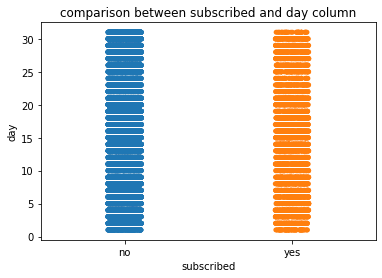

In [45]:
#comparing subscribed and day column
plt.title("comparison between subscribed and day column")
sns.stripplot(x="subscribed",y="day",data=df)
plt.show()

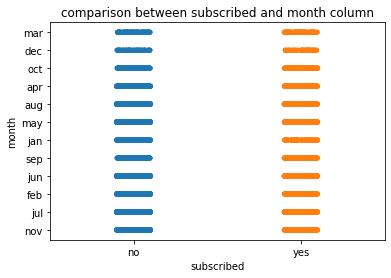

In [46]:
#comparing subscribed and month column
plt.title("comparison between subscribed and month column")
sns.stripplot(x="subscribed",y="month",data=df)
plt.show()

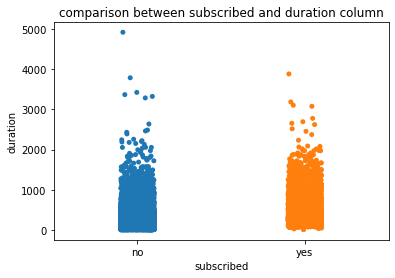

In [47]:
#comparing subscribed and duration column
plt.title("comparison between subscribed and duration column")
sns.stripplot(x="subscribed",y="duration",data=df)
plt.show()

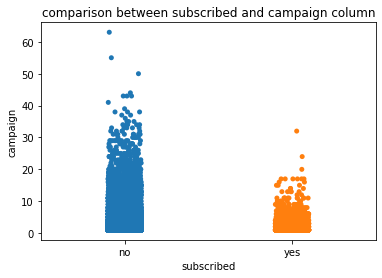

In [48]:
#comparing subscribed and campaign column
plt.title("comparison between subscribed and campaign column")
sns.stripplot(x="subscribed",y="campaign",data=df)
plt.show()

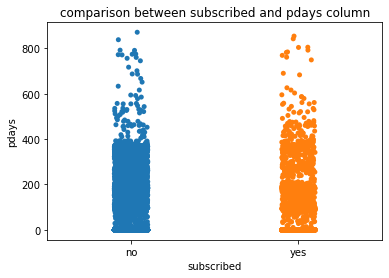

In [49]:
#comparing subscribed and pdays column
plt.title("comparison between subscribed and pdays column")
sns.stripplot(x="subscribed",y="pdays",data=df)
plt.show()

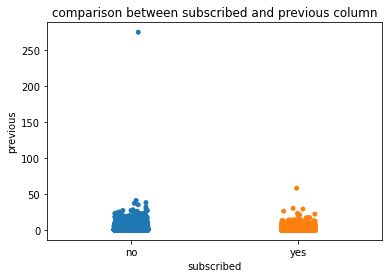

In [50]:
#comparing subscribed and previous column
plt.title("comparison between subscribed and previous column")
sns.stripplot(x="subscribed",y="previous",data=df)
plt.show()

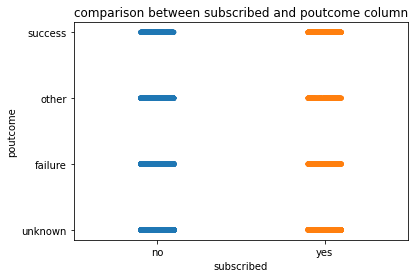

In [52]:
#comparing subscribed and poutcome column
plt.title("comparison between subscribed and poutcome column")
sns.stripplot(x="subscribed",y="poutcome",data=df)
plt.show()

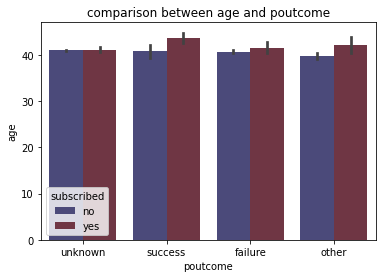

In [54]:
#comparing age and poutcome on the basis of subscribed column
plt.title("comparison between age and poutcome")
sns.barplot(x="poutcome",y="age",data=df,palette="icefire",hue="subscribed")
plt.show()

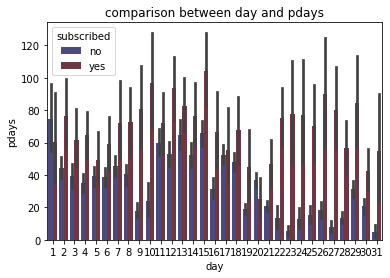

In [55]:
#comparing day and pdays on the basis of subscribed column
plt.title("comparison between day and pdays")
sns.barplot(x="day",y="pdays",data=df,palette="icefire",hue="subscribed")
plt.show()

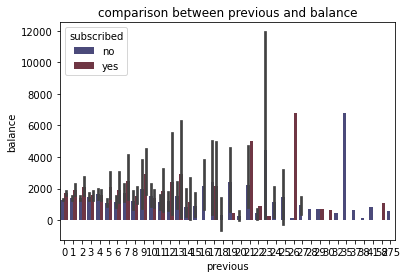

In [56]:
#comparing previous and balance on the basis of subscribed column
plt.title("comparison between previous and balance")
sns.barplot(x="previous",y="balance",data=df,palette="icefire",hue="subscribed")
plt.show()

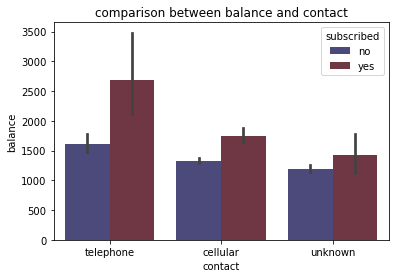

In [59]:
#comparing balance and contact on the basis of subscribed column
plt.title("comparison between balance and contact")
sns.barplot(x="contact",y="balance",data=df,palette="icefire",hue="subscribed")
plt.show()

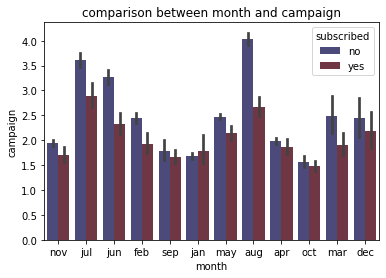

In [60]:
#comparing month and campaign on the basis of subscribed column
plt.title("comparison between month and campaign")
sns.barplot(x="month",y="campaign",data=df,palette="icefire",hue="subscribed")
plt.show()

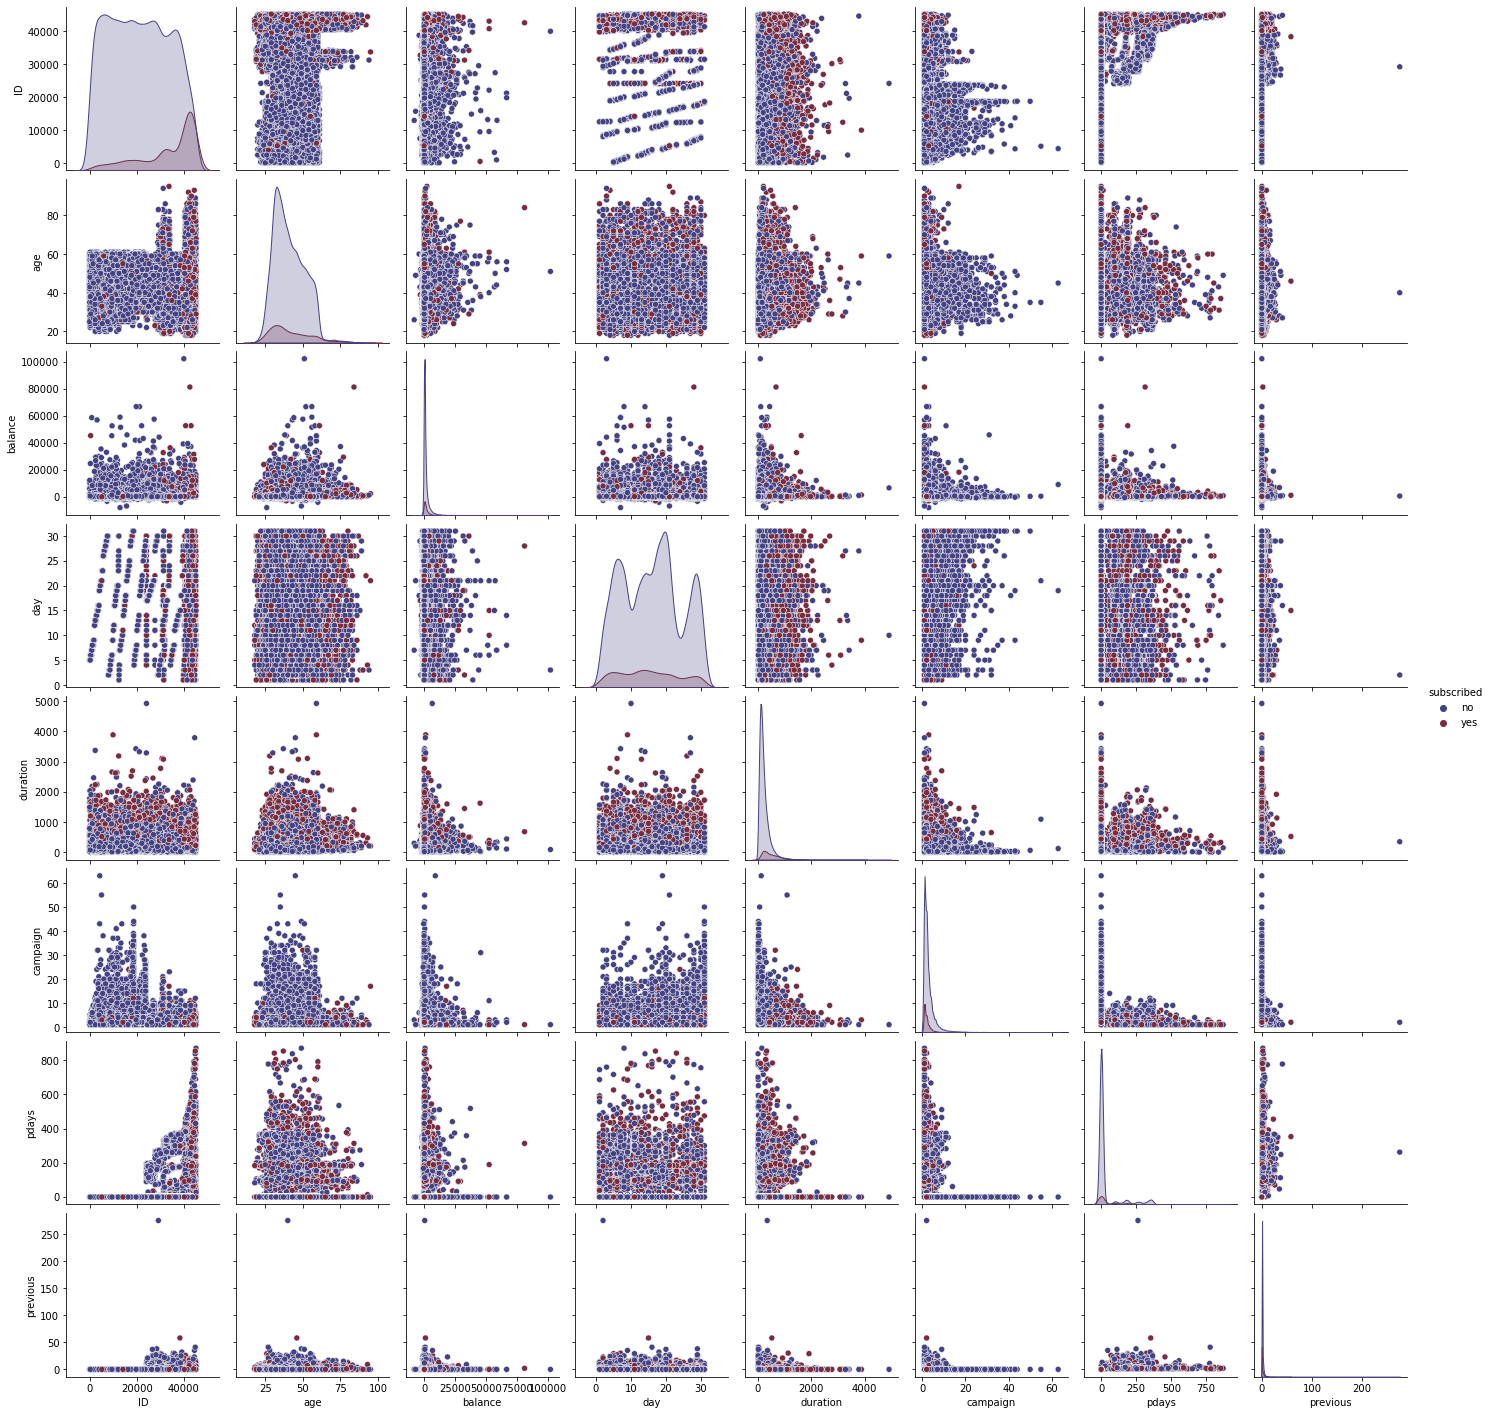

In [27]:
sns.pairplot(df,hue="subscribed",palette="icefire")
plt.show()

This pairplot gives the pairwise relation between the features on the basis of target Subscribed.On the diagonal we can notice the distribution plots.

In [5]:
#Encoding categorical columns using Label Encoder
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=lab_enc.fit_transform(df[i])
df        

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,40178,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,19710,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,38556,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


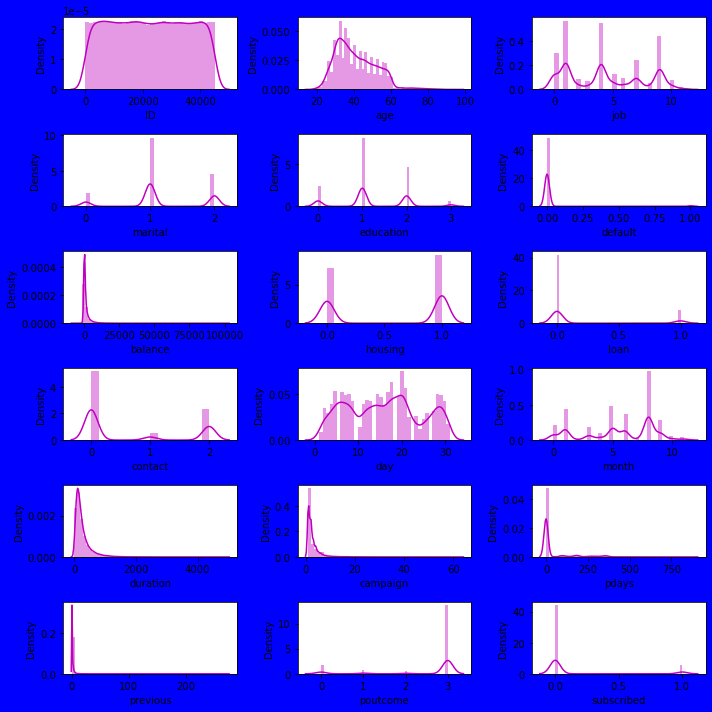

In [32]:
#let's visualize how the data has been distributed in all  the columns.
plt.figure(figsize=(10,10),facecolor="blue")
plotnumber=1
for column in df.columns:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(df[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
    plt.tight_layout()

Data is right skewed in balance,default,duration,campaign,previous,pdays columns

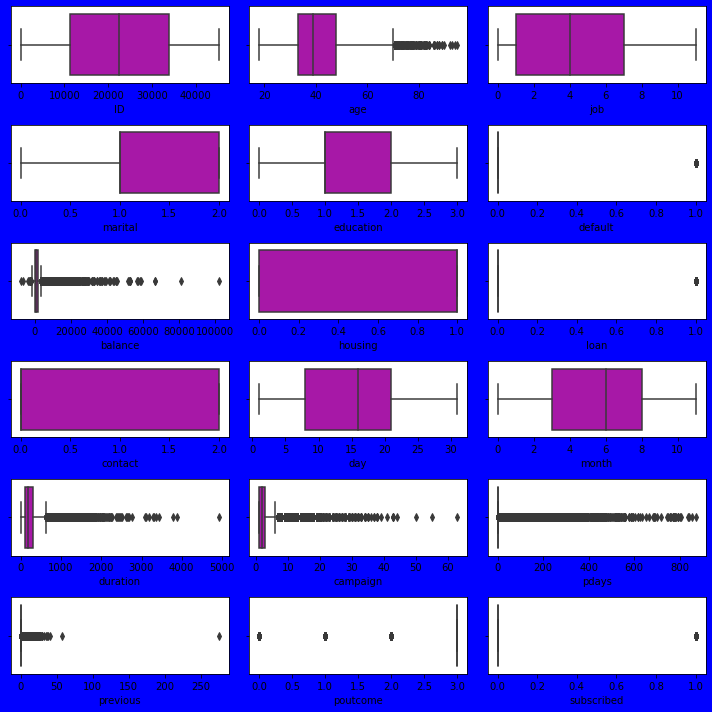

In [33]:
#let's visualize  the data to check the outliers by plotting boxplot  for all  the columns.
plt.figure(figsize=(10,10),facecolor="blue")
plotnumber=1
for column in df.columns:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.boxplot(df[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
    plt.tight_layout()

outliers are present in age,default,balance,loan,duration,campaign,pdays,previous,poutcome,subscribed columns.

In [7]:
#now removing the data above zscore(outliers).
from scipy.stats import zscore
z_score=zscore(df)
abs_z_score=np.abs(z_score)
b=((abs_z_score<3).all(axis=1))
df2=df[b]
df2

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,4,2,1,0,2968,0,0,2,20,6,30,4,-1,0,3,0
31641,9476,37,9,2,2,0,1309,0,0,2,6,6,442,2,-1,0,3,0
31642,36483,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,40178,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1


In [8]:
#threshold=3
np.where(abs_z_score>3)

(array([   10,    21,    26, ..., 31622, 31645, 31646], dtype=int64),
 array([ 5, 13,  6, ..., 14, 15, 12], dtype=int64))

In [9]:
print("Data loss percentage:",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data loss percentage: 12.83849969981357


In [6]:
#Let's check the skewness
df.skew()

ID             0.005851
age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

age,default,balance,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed columns have skewness.let us remove skewness using cbrt method.

In [7]:
df["age"]=np.cbrt(df["age"])
df["default"]=np.cbrt(df["default"])
df["balance"]=np.cbrt(df["balance"])
df["loan"]=np.cbrt(df["loan"])
df["contact"]=np.cbrt(df["contact"])
df["duration"]=np.cbrt(df["duration"])
df["campaign"]=np.cbrt(df["campaign"])
df["pdays"]=np.cbrt(df["pdays"])
df["previous"]=np.cbrt(df["previous"])
df["poutcome"]=np.cbrt(df["poutcome"])


In [8]:
df.skew()

ID            0.005851
age           0.286363
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance      -0.086014
housing      -0.223918
loan          1.833474
contact       0.637383
day           0.087185
month        -0.486498
duration      0.647275
campaign      1.667938
pdays         1.779036
previous      2.079738
poutcome     -2.386125
subscribed    2.377445
dtype: float64

still some skewness is present in default,loan,campaign,pdays,previous,poutcome columns.

In [9]:
df.corr()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,1.000000,-0.007347,0.061805,0.086454,0.096480,-0.051521,0.132513,-0.180047,-0.086140,-0.683037,-0.063399,-0.165274,0.012626,-0.114966,0.488188,0.478953,-0.389485,0.296663
age,-0.007347,1.000000,-0.027208,-0.423149,-0.101250,-0.014852,0.097645,-0.168935,-0.008282,0.054808,-0.008998,-0.038968,-0.014250,0.023006,-0.011360,-0.000488,0.007109,0.009310
job,0.061805,-0.027208,1.000000,0.066124,0.170347,-0.005217,0.030541,-0.125347,-0.039049,-0.076253,0.020951,-0.089384,0.001740,0.004734,-0.007784,0.000043,0.009140,0.038921
marital,0.086454,-0.423149,0.066124,1.000000,0.107547,-0.009591,0.029260,-0.017846,-0.041654,-0.041858,-0.007686,-0.003834,0.013765,-0.020674,0.025247,0.026130,-0.014109,0.046043
education,0.096480,-0.101250,0.170347,0.107547,1.000000,-0.006774,0.075759,-0.095376,-0.045950,-0.115748,0.017902,-0.055967,0.002867,-0.001402,0.020848,0.029767,-0.013107,0.066051
default,-0.051521,-0.014852,-0.005217,-0.009591,-0.006774,1.000000,-0.198400,-0.011823,0.081567,0.011149,0.009996,0.004694,-0.009781,0.018914,-0.036851,-0.036702,0.031525,-0.020168
balance,0.132513,0.097645,0.030541,0.029260,0.075759,-0.198400,1.000000,-0.087058,-0.142789,-0.038474,-0.011106,-0.002360,0.038476,-0.035939,0.060453,0.070936,-0.045867,0.097107
housing,-0.180047,-0.168935,-0.125347,-0.017846,-0.095376,-0.011823,-0.087058,1.000000,0.036244,0.176243,-0.025666,0.271442,0.001012,-0.033177,0.081725,0.053207,-0.101403,-0.141092
loan,-0.086140,-0.008282,-0.039049,-0.041654,-0.045950,0.081567,-0.142789,0.036244,1.000000,-0.011394,0.014769,0.024186,-0.011323,0.006838,-0.025042,-0.025072,0.002834,-0.072266
contact,-0.683037,0.054808,-0.076253,-0.041858,-0.115748,0.011149,-0.038474,0.176243,-0.011394,1.000000,-0.023095,0.351713,-0.039839,0.024199,-0.270693,-0.260850,0.237842,-0.144073


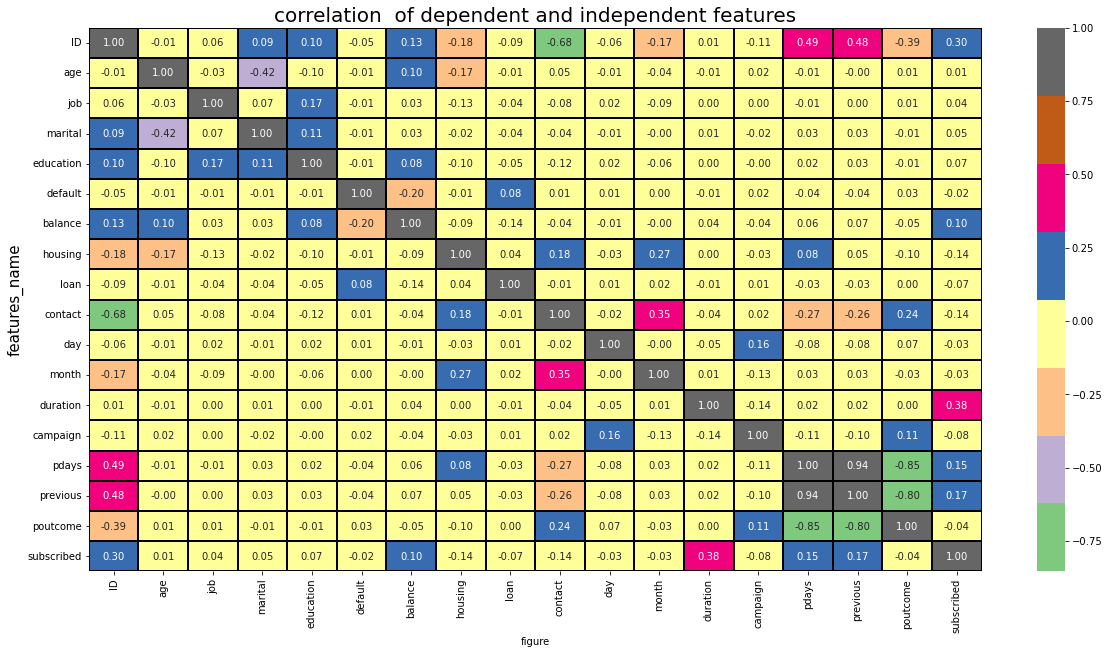

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True,fmt="0.2f",linewidth=0.2,linecolor="black",cmap="Accent")
plt.xlabel('figure',fontsize=10)
plt.ylabel("features_name",fontsize=15)
plt.title("correlation  of dependent and independent features",fontsize=20)
plt.show()

This gives the correlation between independent variable and dependent variables.

In [10]:
sort_values=df.corr()['subscribed'].sort_values(ascending=False)
sort_values

subscribed    1.000000
duration      0.379716
ID            0.296663
previous      0.167908
pdays         0.152555
balance       0.097107
education     0.066051
marital       0.046043
job           0.038921
age           0.009310
default      -0.020168
month        -0.028088
day          -0.029600
poutcome     -0.040794
loan         -0.072266
campaign     -0.082134
housing      -0.141092
contact      -0.144073
Name: subscribed, dtype: float64

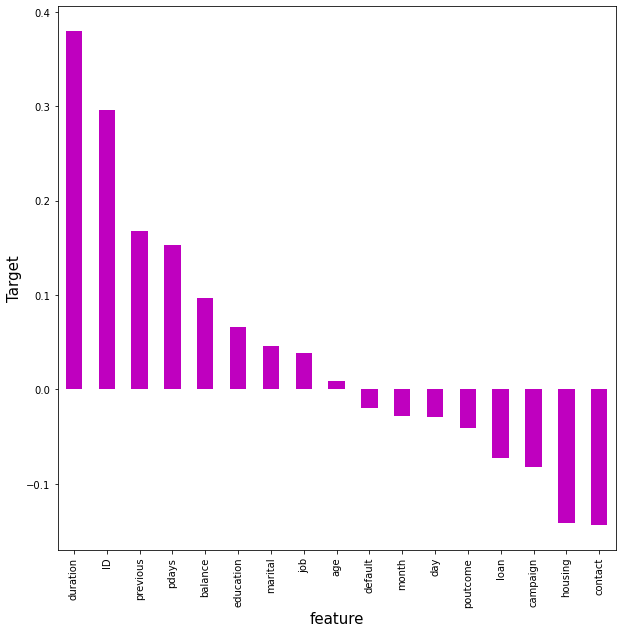

In [17]:
#visualizing the correlation between features and target
plt.figure(figsize=(10,10))
df.corr()['subscribed'].sort_values(ascending=False).drop(['subscribed']).plot(kind="bar",color="m")
plt.xlabel('feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.show()

Here we can see the positive and negative correlated features with the target.

In [10]:
#seperating Features and Label
X=df.drop("subscribed",axis=1)
Y=df["subscribed"]

In [11]:
x2=df1
x2

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,11743,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,28292,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3
13562,45163,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2


In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
x

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.271192,1.383398,-1.324317,-0.275405,2.369229,-0.137234,0.757778,-1.118201,-0.439893,0.977386,0.379579,1.154007,-1.328474,-0.127816,-0.461627,-0.449105,0.398005
1,1.377516,-0.961854,2.037729,-0.275405,-0.300345,-0.137234,-0.911548,-1.118201,-0.439893,-0.737430,0.499526,-0.177462,-0.775734,-0.127816,-0.461627,-0.449105,0.398005
2,-0.554001,-1.446270,0.815167,-0.275405,-0.300345,-0.137234,0.328224,0.894294,-0.439893,-0.737430,0.259631,-0.177462,0.204835,-0.873593,-0.461627,-0.449105,0.398005
3,1.636469,1.460966,-0.101755,-1.922374,1.034442,-0.137234,1.123262,-1.118201,-0.439893,-0.737430,0.739422,0.155405,2.101938,-0.873593,1.542654,2.189741,-0.011130
4,0.556606,-0.961854,1.426448,-0.275405,-0.300345,-0.137234,-0.384677,0.894294,-0.439893,-0.737430,-1.419637,-0.843197,0.792477,-0.873593,-0.461627,-0.449105,0.398005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.064493,-1.198489,-0.101755,1.371563,1.034442,-0.137234,-1.130128,0.894294,-0.439893,-0.737430,-0.460055,0.821140,-0.559197,-0.127816,-0.461627,-0.449105,0.398005
31643,1.347078,1.145007,-0.101755,-1.922374,1.034442,-0.137234,-0.032392,-1.118201,2.273280,-0.737430,-1.299690,0.155405,0.993105,-0.127816,-0.461627,-0.449105,0.398005
31644,-0.218265,-0.847342,-0.101755,1.371563,1.034442,-0.137234,-0.102219,-1.118201,-0.439893,-0.737430,-1.059794,-1.508931,-1.441655,0.395329,-0.461627,-0.449105,0.398005
31645,1.223031,1.460966,1.426448,-0.275405,-0.300345,-0.137234,-0.208341,0.894294,-0.439893,0.977386,-0.100212,0.821140,-1.744523,1.745828,2.503686,3.739801,-2.838320


In [13]:
#Finding variance inflation factor in each scaled column.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["features"]=x.columns
vif

,VIF values,features
0,2.532444,ID
1,1.304674,age
2,1.050294,job
3,1.253989,marital
4,1.066870,education
5,1.046539,default
6,1.101026,balance
7,1.205175,housing
8,1.042635,loan
9,2.212994,contact


By checking the vif values,we can see that the multi collinearity is present in the dataset.pdays vif value is greater than 10 and previous vif value is greater than 5(8.132704).so remove pdays column to solve this issue.

In [14]:
x.drop("pdays",axis=1,inplace=True)
x

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,0.271192,1.383398,-1.324317,-0.275405,2.369229,-0.137234,0.757778,-1.118201,-0.439893,0.977386,0.379579,1.154007,-1.328474,-0.127816,-0.449105,0.398005
1,1.377516,-0.961854,2.037729,-0.275405,-0.300345,-0.137234,-0.911548,-1.118201,-0.439893,-0.737430,0.499526,-0.177462,-0.775734,-0.127816,-0.449105,0.398005
2,-0.554001,-1.446270,0.815167,-0.275405,-0.300345,-0.137234,0.328224,0.894294,-0.439893,-0.737430,0.259631,-0.177462,0.204835,-0.873593,-0.449105,0.398005
3,1.636469,1.460966,-0.101755,-1.922374,1.034442,-0.137234,1.123262,-1.118201,-0.439893,-0.737430,0.739422,0.155405,2.101938,-0.873593,2.189741,-0.011130
4,0.556606,-0.961854,1.426448,-0.275405,-0.300345,-0.137234,-0.384677,0.894294,-0.439893,-0.737430,-1.419637,-0.843197,0.792477,-0.873593,-0.449105,0.398005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.064493,-1.198489,-0.101755,1.371563,1.034442,-0.137234,-1.130128,0.894294,-0.439893,-0.737430,-0.460055,0.821140,-0.559197,-0.127816,-0.449105,0.398005
31643,1.347078,1.145007,-0.101755,-1.922374,1.034442,-0.137234,-0.032392,-1.118201,2.273280,-0.737430,-1.299690,0.155405,0.993105,-0.127816,-0.449105,0.398005
31644,-0.218265,-0.847342,-0.101755,1.371563,1.034442,-0.137234,-0.102219,-1.118201,-0.439893,-0.737430,-1.059794,-1.508931,-1.441655,0.395329,-0.449105,0.398005
31645,1.223031,1.460966,1.426448,-0.275405,-0.300345,-0.137234,-0.208341,0.894294,-0.439893,0.977386,-0.100212,0.821140,-1.744523,1.745828,3.739801,-2.838320


In [16]:
#Again checking vif values to check whether the multicollinearity still exists or not
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["features"]=x.columns
vif

,VIF values,features
0,2.480912,ID
1,1.304151,age
2,1.050074,job
3,1.253853,marital
4,1.066622,education
5,1.046537,default
6,1.100506,balance
7,1.198979,housing
8,1.042505,loan
9,2.209478,contact


so,we have solved multicollinearity issue, we can now move ahead for model building.

In [15]:
Y.value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

Here we can see the data is imbalanced,so we are using RandomOverSampler method to balance the data

Oversampling the data:

In [16]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [17]:
from imblearn.over_sampling import RandomOverSampler
rs=RandomOverSampler()
x1,y1=rs.fit_resample(x,Y)

In [18]:
y1.value_counts()

0    27932
1    27932
Name: subscribed, dtype: int64

In [19]:
x1.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'previous', 'poutcome'],
      dtype='object')

In [20]:
x2

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,11743,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,28292,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3
13562,45163,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2


In [21]:
x2.drop("pdays",axis=1,inplace=True)
x2

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0,45,0,0,0,28,1,148,4,0,3
13560,11743,54,1,1,0,0,2281,1,0,2,20,6,158,1,0,3
13561,28292,35,5,1,0,0,285,1,0,0,29,4,136,1,0,3
13562,45163,29,0,2,1,0,464,0,0,0,9,9,208,2,3,2


Modelling:

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [23]:

# Split the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=200)
x_test_2,y_test_2=train_test_split(x2,test_size=0.25,random_state=200)

In [24]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [25]:
def m_score(name,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=name.predict(x_train)
        print("Training result")
        print(f"Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    else:
         if train==False:
            pred=name.predict(x_test)
            print("\n----Test Result----")
            print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
            print("confusion_matrix:\n\n",confusion_matrix(y_test,pred))
            print("\n Test classification report:\n\n",classification_report(y_test,pred,digits=2))


In [26]:
#Model initiation for RandomForestClassifier
name=RandomForestClassifier()
name.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
m_score(name,x_train,x_test,y_train,y_test,train=True)
m_score(name,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:100.00%

----Test Result----
Accuracy score:96.45%
confusion_matrix:

 [[6458  488]
 [   8 7012]]

 Test classification report:

               precision    recall  f1-score   support

           0       1.00      0.93      0.96      6946
           1       0.93      1.00      0.97      7020

    accuracy                           0.96     13966
   macro avg       0.97      0.96      0.96     13966
weighted avg       0.97      0.96      0.96     13966



The accuracy score using RandomForest Classifier is 96.44%

In [28]:

#test on  the 2nd model
y_pred=name.predict(x_test_2)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [29]:
y_pred.shape

(10173,)

In [30]:

#test on  the 2nd model
y_pred=name.predict(x_test_2)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [31]:
y_test[0:10173]

48960    1
24557    1
24190    0
5399     0
32675    1
        ..
18625    0
51457    1
3506     1
14074    0
33167    1
Name: subscribed, Length: 10173, dtype: int32

In [32]:
#evaluate accuracy
print(accuracy_score(y_test[0:10173], y_pred))

0.49572397522854617


The accuracy for the new test dataset using RandomForestClassifier is 49.56%=50%.The customers will subscribe to termdeposit is 50%.

In [33]:
#checking cv score for RandomForestClassifier using test dataset.
score=cross_val_score(name,x2[0:10173],y1[0:10173])
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test[0:10173],y_pred)-score.mean())

[0.88206388 0.88157248 0.88108108 0.8820059  0.88151426]
0.8816475204085824
Difference between Accuracy score and cross validation score is: -0.38592354518003624


In [57]:
#Model initiation for SupportVectorMachineClassifier
name1=SVC()
name1.fit(x_train,y_train)

SVC()

In [76]:
m_score(name1,x_train,x_test,y_train,y_test,train=True)
m_score(name1,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:89.41%

----Test Result----
Accuracy score:88.77%
confusion_matrix:

 [[5818 1128]
 [ 441 6579]]

 Test classification report:

               precision    recall  f1-score   support

           0       0.93      0.84      0.88      6946
           1       0.85      0.94      0.89      7020

    accuracy                           0.89     13966
   macro avg       0.89      0.89      0.89     13966
weighted avg       0.89      0.89      0.89     13966



The accuracy score using supportvectormachineclassifier is 88.77%

In [60]:
#test on  the 2nd model
y_pred=name1.predict(x_test_2)
y_pred
#evaluate accuracy
print(accuracy_score(y_test[0:10173], y_pred))


0.49621547232871327


The accuracy for the new test dataset using SupportvectormachineClassifier is 49.62%=50%.The customers will subscribe to termdeposit is 50%.

In [61]:
#checking cv score for SupportVectorMachineClassifier using test dataset.
score1=cross_val_score(name1,x2[0:10173],y1[0:10173])
print(score1)
print(score1.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test[0:10173],y_pred)-score1.mean())

[0.88206388 0.88206388 0.88206388 0.8820059  0.8820059 ]
0.8820406891203352
Difference between Accuracy score and cross validation score is: -0.3858252167916219


In [62]:
#Model initiation for GradientBoostingClassifier
name2=GradientBoostingClassifier()
name2.fit(x_train,y_train)

GradientBoostingClassifier()

In [74]:
m_score(name2,x_train,x_test,y_train,y_test,train=True)
m_score(name2,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:89.46%

----Test Result----
Accuracy score:89.23%
confusion_matrix:

 [[5888 1058]
 [ 446 6574]]

 Test classification report:

               precision    recall  f1-score   support

           0       0.93      0.85      0.89      6946
           1       0.86      0.94      0.90      7020

    accuracy                           0.89     13966
   macro avg       0.90      0.89      0.89     13966
weighted avg       0.90      0.89      0.89     13966



The accuracy score using GradientBoostingClassifier is 89.23%

In [63]:
#test on  the 2nd model
y_pred=name2.predict(x_test_2)
y_pred
#evaluate accuracy
print(accuracy_score(y_test[0:10173], y_pred))


0.5016219404305514


The accuracy for the new test dataset using GradientBoostingClassifier is 50.16%=50%.The customers will subscribe to termdeposit is 50%.

In [67]:
#checking cv score for GradientBoostingClassifier using test dataset.
score2=cross_val_score(name2,x2[0:10173],y1[0:10173])
print(score2)
print(score2.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test[0:10173],y_pred)-score2.mean())

[0.88009828 0.88108108 0.88009828 0.88151426 0.87905605]
0.8803695892191467
Difference between Accuracy score and cross validation score is: -0.37658506154785987


In [68]:
#Model initiation for AdaBoostClassifier
name3=AdaBoostClassifier()
name3.fit(x_train,y_train)

AdaBoostClassifier()

In [75]:
m_score(name3,x_train,x_test,y_train,y_test,train=True)
m_score(name3,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:86.75%

----Test Result----
Accuracy score:86.78%
confusion_matrix:

 [[6016  930]
 [ 916 6104]]

 Test classification report:

               precision    recall  f1-score   support

           0       0.87      0.87      0.87      6946
           1       0.87      0.87      0.87      7020

    accuracy                           0.87     13966
   macro avg       0.87      0.87      0.87     13966
weighted avg       0.87      0.87      0.87     13966



The accuracy score using AdaBoostClassifier is 86.78%

In [66]:
#test on  the 2nd model
y_pred=name3.predict(x_test_2)
y_pred
#evaluate accuracy
print(accuracy_score(y_test[0:10173], y_pred))


0.5037845276712868


The accuracy for the new test dataset using AdaBoostClassifier is 50.37%=50%.The customers will subscribe to termdeposit is 50%.

In [69]:
#checking cv score for AdaBoostClassifier using test dataset.
score3=cross_val_score(name3,x2[0:10173],y1[0:10173])
print(score3)
print(score3.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test[0:10173],y_pred)-score3.mean())

[0.87960688 0.88058968 0.88058968 0.8820059  0.88053097]
0.8806646227885165
Difference between Accuracy score and cross validation score is: -0.37688009511722975


In [70]:
#Model initiation for DecisionTreeClassifier
name4=DecisionTreeClassifier()
name4.fit(x_train,y_train)

DecisionTreeClassifier()

In [73]:
m_score(name4,x_train,x_test,y_train,y_test,train=True)
m_score(name4,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:100.00%

----Test Result----
Accuracy score:96.28%
confusion_matrix:

 [[6436  510]
 [   9 7011]]

 Test classification report:

               precision    recall  f1-score   support

           0       1.00      0.93      0.96      6946
           1       0.93      1.00      0.96      7020

    accuracy                           0.96     13966
   macro avg       0.97      0.96      0.96     13966
weighted avg       0.97      0.96      0.96     13966



The accuracy score using DecisionTreeClassifier is 96.28%

In [71]:
#test on  the 2nd model
y_pred=name4.predict(x_test_2)
y_pred
#evaluate accuracy
print(accuracy_score(y_test[0:10173], y_pred))


0.49710016710901406


The accuracy for the new test dataset using DecisionTreeClassifier is 49.71%=50%.The customers will subscribe to termdeposit is 50%.

In [72]:
#checking cv score for DecisionTreeClassifier using test dataset.
score4=cross_val_score(name4,x2[0:10173],y1[0:10173])
print(score4)
print(score4.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test[0:10173],y_pred)-score4.mean())

[0.76511057 0.77199017 0.76609337 0.773353   0.76843658]
0.7689967360763821
Difference between Accuracy score and cross validation score is: -0.271896568967368


In [77]:
#Model initiation for ExtraTreesClassifier
name5=ExtraTreesClassifier()
name5.fit(x_train,y_train)

ExtraTreesClassifier()

In [78]:
m_score(name5,x_train,x_test,y_train,y_test,train=True)
m_score(name5,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:100.00%

----Test Result----
Accuracy score:98.02%
confusion_matrix:

 [[6683  263]
 [  14 7006]]

 Test classification report:

               precision    recall  f1-score   support

           0       1.00      0.96      0.98      6946
           1       0.96      1.00      0.98      7020

    accuracy                           0.98     13966
   macro avg       0.98      0.98      0.98     13966
weighted avg       0.98      0.98      0.98     13966



The accuracy score using ExtraTreesClassifier is 98.02%

In [79]:
#test on  the 2nd model
y_pred=name5.predict(x_test_2)
y_pred
#evaluate accuracy
print(accuracy_score(y_test[0:10173], y_pred))


0.500835545070284


The accuracy for the new test dataset using ExtraTreesClassifier is 50.08%=50%.The customers will subscribe to termdeposit is 50%.

In [80]:
#checking cv score for ExtraTreesClassifier using test dataset.
score5=cross_val_score(name5,x2[0:10173],y1[0:10173])
print(score5)
print(score5.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test[0:10173],y_pred)-score5.mean())

[0.87911548 0.87911548 0.87960688 0.88003933 0.87954769]
0.8794849716973612
Difference between Accuracy score and cross validation score is: -0.3786494266270771


In [81]:
#Model initiation for BaggingClassifier
name6=BaggingClassifier()
name6.fit(x_train,y_train)

BaggingClassifier()

In [82]:
m_score(name6,x_train,x_test,y_train,y_test,train=True)
m_score(name6,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:99.88%

----Test Result----
Accuracy score:96.65%
confusion_matrix:

 [[6485  461]
 [   7 7013]]

 Test classification report:

               precision    recall  f1-score   support

           0       1.00      0.93      0.97      6946
           1       0.94      1.00      0.97      7020

    accuracy                           0.97     13966
   macro avg       0.97      0.97      0.97     13966
weighted avg       0.97      0.97      0.97     13966



The accuracy score using Baggingclassifier is 96.65%

In [83]:
#test on  the 2nd model
y_pred=name6.predict(x_test_2)
y_pred
#evaluate accuracy
print(accuracy_score(y_test[0:10173], y_pred))


0.49621547232871327


The accuracy for the new test dataset using BaggingClassifier is 49.62%=50%.The customers will subscribe to termdeposit is 50%. 

In [84]:
#checking cv score for BaggingClassifier using test dataset.
score6=cross_val_score(name6,x2[0:10173],y1[0:10173])
print(score6)
print(score6.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test[0:10173],y_pred)-score6.mean())

[0.87518428 0.87223587 0.87272727 0.87413963 0.87561455]
0.8739803198210279
Difference between Accuracy score and cross validation score is: -0.3777648474923146



RandomForestClassifier is our best model,as the difference between accuracy score and cv score is least.



RandomForestClassifier is our best model and we will do Hyper parameter tuning for this model.

HyperParameter Tuning:

In [34]:
#for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
parameters={'criterion':['gini','entropy','log_loss'],
            'n_estimators':range(10,20),
            'max_depth':range(5,10),
            'max_features':['sqrt','log2'],
            'max_leaf_nodes':range(5,10)
           }

In [39]:
GSV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [40]:
GSV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(5, 10),
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': range(5, 10),
                         'n_estimators': range(10, 20)})

In [41]:
GSV.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'max_leaf_nodes': 9,
 'n_estimators': 18}

In [42]:
model=RandomForestClassifier(criterion='entropy',max_depth=9,n_estimators=18,max_leaf_nodes=9,max_features='log2')
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       max_leaf_nodes=9, n_estimators=18)

In [50]:
#finding accuracy on original dataset.
pred=model.predict(x_test)
accu=accuracy_score(y_test,pred)
print(accu*100)

86.25232708005154


The accuracy on original dataset using RandomForestClassifier in GridSearchCV is 86.25%

In [44]:
y_test

48960    1
24557    1
24190    0
5399     0
32675    1
        ..
26961    0
51263    1
13045    0
51541    1
1559     0
Name: subscribed, Length: 13966, dtype: int32

In [76]:
y_pred=model.predict(x_test_2)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [77]:
y_pred.shape

(10173,)

In [46]:
y_test.shape

(13966,)

In [51]:
conf_matrix=confusion_matrix(y_test,pred)
conf_matrix

array([[5824, 1122],
       [ 798, 6222]], dtype=int64)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      6946
           1       0.85      0.89      0.87      7020

    accuracy                           0.86     13966
   macro avg       0.86      0.86      0.86     13966
weighted avg       0.86      0.86      0.86     13966



In [78]:
#finding accuracy on test dataset.
pred=model.predict(x_test_2)
accu=accuracy_score(y_test[0:10173],y_pred)
print(accu*100)

50.37845276712868


The accuracy using RandomForestClassifier using GridSearchCV on test dataset is 50.37%=50%.The customers will subscribe to termdeposit on test dataset is 50%

In [79]:
conf_matrix=confusion_matrix(y_test[0:10173],y_pred)
conf_matrix

array([[   0, 5048],
       [   0, 5125]], dtype=int64)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test[0:10173],y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5048
           1       0.50      1.00      0.67      5125

    accuracy                           0.50     10173
   macro avg       0.25      0.50      0.34     10173
weighted avg       0.25      0.50      0.34     10173



Threshold= [2 1 0]
True positive rate= [0.         0.88632479 1.        ]
False positive Rate= [0.         0.16153182 1.        ]


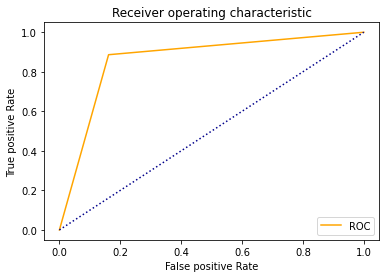

In [62]:
#roc_curve on original dataset.
fpr,tpr,thresholds=roc_curve(y_test,pred)
print('Threshold=',thresholds)
print('True positive rate=',tpr)
print('False positive Rate=',fpr)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='dotted')
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [61]:
pred=model.predict(x_test)
pred.shape

(13966,)

In [60]:
y_test.shape

(13966,)

Threshold= [2 1]
True positive rate= [0. 1.]
False positive Rate= [0. 1.]


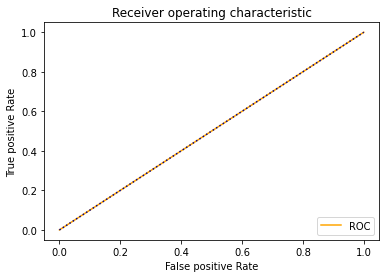

In [81]:
#roc_curve on test dataset.
fpr,tpr,thresholds=roc_curve(y_test[0:10173],y_pred)
print('Threshold=',thresholds)
print('True positive rate=',tpr)
print('False positive Rate=',fpr)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='dotted')
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [87]:
auc_score=roc_auc_score(y_test,model.predict(x_test))
print("AUC_score:",auc_score*100,"%")

AUC_score: 86.2396484725883 %


Here we plotted the ROC curve for the final model on original dataset.The accuracy or AUC_score for the best model is 86.23%


In [86]:
from sklearn.metrics import roc_auc_score,auc
from sklearn.metrics import roc_curve
auc_score=roc_auc_score(y_test[0:10173],model.predict(x_test_2))
print("AUC_score:",auc_score*100,"%")

AUC_score: 50.0 %


Here we plotted the ROC curve for the final model on test dataset.The accuracy or AUC_score for the best model is 50.0%

In [88]:
#saving the model
import joblib
joblib.dump(model,"Bank_termdeposit_project.pkl")


['Bank_termdeposit_project.pkl']

In [89]:
#predicting the saved model using original dataset.
model=joblib.load("Bank_termdeposit_project.pkl")
#prediction
prediction=model.predict(x_test)
prediction

array([1, 1, 0, ..., 0, 1, 0])

In [93]:
prediction.shape

(10173,)

In [91]:
#predicting the saved model using test dataset.
model=joblib.load("Bank_termdeposit_project.pkl")
#prediction
prediction1=model.predict(x_test_2)
prediction1

array([1, 1, 1, ..., 1, 1, 1])

In [94]:
prediction1.shape

(10173,)

In [95]:
#Framing a dataframe using  predicted and original array of prediction using original dataset. 
a=np.array(y_test[0:10173])
df3=pd.DataFrame()
df3['predicted']=prediction
df3["original"]=a
df3    

,predicted,original
0,1,1
1,1,1
2,1,0
3,1,0
4,1,1
...,...,...
10168,1,0
10169,1,1
10170,1,1
10171,1,0


In [97]:
#Framing a dataframe using  predicted and original array of prediction using test dataset. 
a=np.array(y_test[0:10173])
df4=pd.DataFrame()
df4['predicted']=prediction1
df4["original"]=a
df4    

,predicted,original
0,1,1
1,1,1
2,1,0
3,1,0
4,1,1
...,...,...
10168,1,0
10169,1,1
10170,1,1
10171,1,0
